![image.png](attachment:image.png)

# CS-331: Introduction to Artifical Intelligence

## Linear Regression - 100 Marks



#### Name: Raza Hamid
#### Roll Number: 26100319

 ### Instructions:
- The aim of this assignment is to familiarize you with Uni-variate Linear Regression and Multi-variate Linear Regreesion..
- You can only use Python programming language and Jupyter Notebooks.
- Submit a zip file containing both the notebooks (.ipynb file) and their python files (.py file). Name the zip file `X_PA1`, where X is your rollnumber.
- Rename the notebook `rollnumber_PA1.ipynb` by replacing `rollnumber` with your rollnumber. Same naming convention for the .py file
- Please make sure all cells have been run.
- The code MUST be done independently. Any plagiarism or copying of work from others will not be tolerated.
- You are only supposed to write your code in the regions specified! Do NOT change any code that has already been written for you!
- You CANNOT use the scikit learn library to implement any function, unless mentioned otherwise. The entire implementation should be your own!

## Dataset Description

The `temperatures.csv` dataset is designed for bias correction of next-day maximum and minimum air temperature forecasts produced by the Local Data Assimilation and Prediction System (LDAPS) operated by the Korea Meteorological Administration. It covers summer seasons from 2013 to 2017 in Seoul, South Korea.

Dataset Summary:
- **Feature Type:** Real
- **Instances:** 7586
- **Input Features:** 21 (including present-day temperature data, LDAPS model forecasts, and geographical information)
- **Output:** Next-day maximum (Next_Tmax)


We want to predict the next day temperature given the various features

#### Libraries used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\razah\AppData\Local\Temp\ipykernel_19824\3061269838.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Import Dataset

Here you will load the `temperatures.csv` file using <b>Pandas</b> library

In [6]:
# code here
df = pd.read_csv('temperatures.csv')

## Part 1 - Univariate Regression (40 Marks)

In this part, you will develop a univariate regression model using maximum temperature on present day `(Present_Tmax)` to predict the next day temperature `(Next_Tmax)`

#### Feature Extraction:

Extract the `Present_Tmax` column as input and the `Next_Tmax` column as output from the dataset.

In [9]:
#code here
input_data = df['Present_Tmax'].tolist()
output_data = df['Next_Tmax'].tolist()

#### Splitting the dataset
Make a 70 30 split to divide the dataset into training and test dataset which will result in 4 variables: X_train, Y_train, X_test, Y_test

In [10]:
#code here
split_index = int(len(input_data) * 0.7)

X_train = input_data[:split_index]
Y_train = output_data[:split_index]

X_test = input_data[split_index:]
Y_test = output_data[split_index:]

### Learn the parameters
In this part, you will fit the linear regression parameters $\theta_0$ and $\theta_1$ to the given dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, your parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [56]:
def predict_SLR(X, theta0, theta1): #you will have to decide the parameters for this function
    #This function will return the predicted value of y based on the given parameters
    y_predicted = theta0 + theta1 * X
    round(y_predicted, 1)
    return y_predicted

def cost_SLR(X, Y, theta0, theta1): #you will have to decide the parameters for this function
    m = len(X)
    total_error = 0
    for i in range(m):
        total_error += (predict_SLR(X[i], theta0, theta1) - Y[i]) ** 2
        total_error = round(total_error, 1)
    # Mean squared error
    cost = total_error / (2 * m)
    return cost

def gradient_descent_SLR(X,Y,alpha,epochs):
    J = [] # this is a list of result of the cost function with each iteration
    #you will need to start with arbitrary values of theta0 and theta1. Initialise those here
    m = len(X)

    theta0 = 1
    theta1 = 1

    for epoch in range(epochs):
        #this is the loop that will implement gradient descent. With each iteration, you will need to update the values of theta0 and theta1
        #you will also have to calculate the loss with each updated value of theta0 and theta1
        theta0_gradient = 0
        theta1_gradient = 0
        for i in range(m):
            theta0_gradient += (predict_SLR(X[i], theta0, theta1) - Y[i])
            theta1_gradient += (predict_SLR(X[i], theta0, theta1) - Y[i]) * X[i]

        theta0 -= (alpha * theta0_gradient) / m
        theta1 -= (alpha * theta1_gradient) / m
        J.append(cost_SLR(X, Y, theta0, theta1))

    return theta0,theta1,J

#### Running Linear Regression

Tune the hyperparameters (epochs and learning rate) to get the best fit model for linear regression

In [57]:
#you will have to set these values to get the best fit model for linear regression
n_epoch = 4000
alpha = 0.00000001

#this is the call to the gradient descent function
#here X_train and Y_train are the arrays that you formed above using the dataset
theta0, theta1, J = gradient_descent_SLR(X_train,Y_train,alpha,n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = 1.0000, theta1 = 0.9993, cost = 3.6314


#### Plotting results

 This should output a graph with the original dataset points and the linear regression model using your learned values of theta0 and theta1


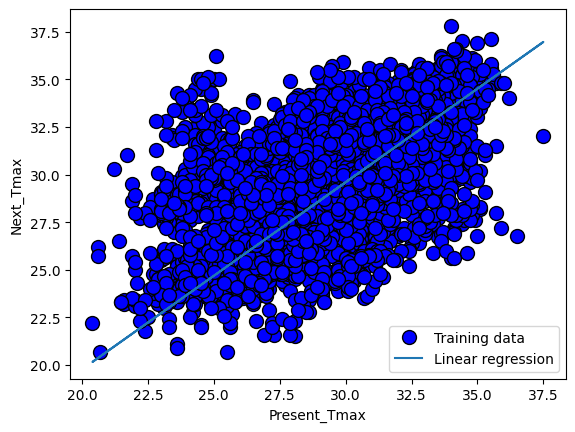

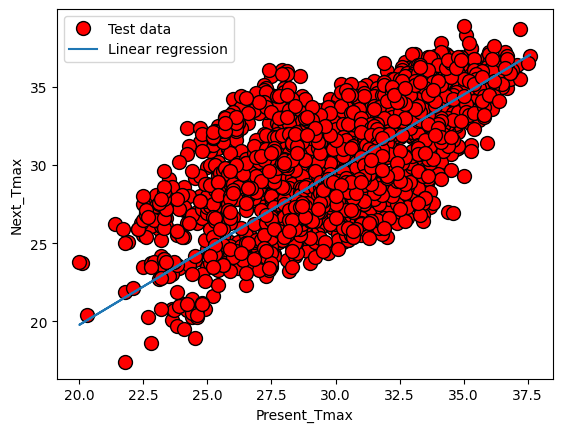

In [42]:
#DO NOT EDIT THIS CELL.
y_pred_list_train = list()
for x in X_train:
    y_pred_list_train.append(predict_SLR(x, theta0, theta1))

plt.plot(X_train, Y_train, 'bo', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(X_train, y_pred_list_train, '-')
plt.legend(['Training data', 'Linear regression'])
plt.show()

y_pred_list_test = list()
for x in X_test:
    y_pred_list_test.append(predict_SLR(x, theta0, theta1))

plt.plot(X_test, Y_test, 'ro', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(X_test, y_pred_list_test, '-')
plt.legend(['Test data', 'Linear regression'])
plt.show()

### Finding the Correlation
Correlation is used to assess the association between features (input variables) and the target variable (output variable) in a dataset.

* A positive correlation indicates a direct, linear relationship: as one variable increases, the other tends to increase as well.
* A negative correlation indicates an inverse, linear relationship: as one variable increases, the other tends to decrease.
* A correlation of 0 suggests no linear relationship between the variables.

<br>
Pick the top 5 features that have the best correlation with Next_Tmax and write them in the markdown block below the code block
We will be using the following function to plot the correlation






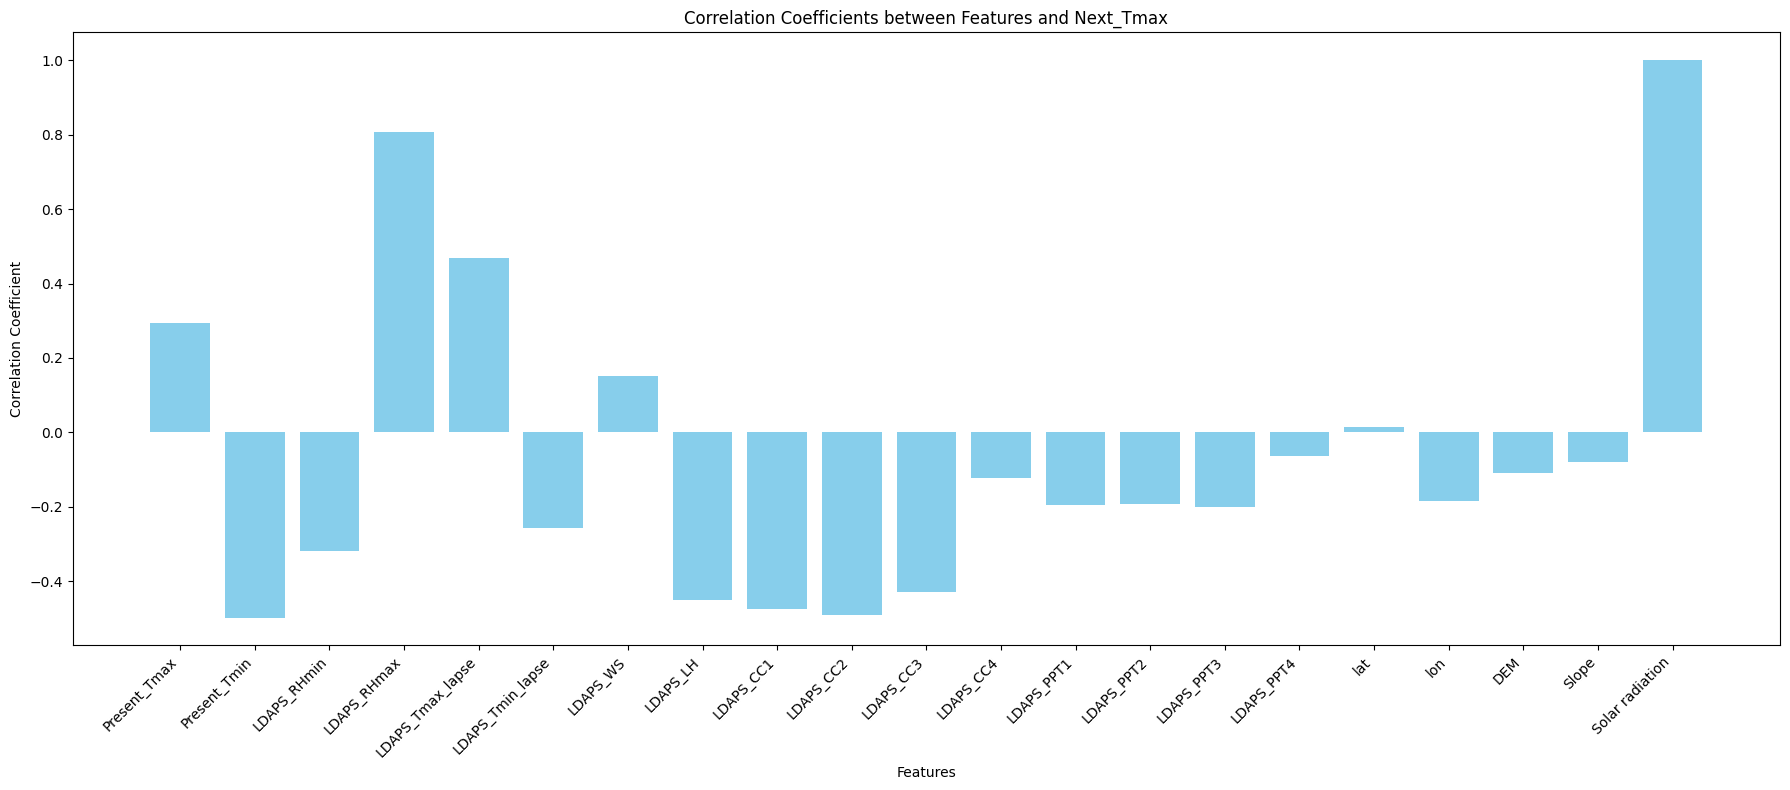

In [58]:
#the features parameter is all the 22 columns other than the output feature in the dataset
features = df.iloc[:, 1:-1]
features = features[:split_index]
correlations = np.corrcoef(features, Y_train, rowvar=False)[:21, -1]
column_names = df.columns[:21]
plt.figure(figsize=(18, 8))
plt.bar(range(1, 22), correlations, tick_label=column_names, color='skyblue')
plt.title('Correlation Coefficients between Features and Next_Tmax')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top 5 features here:
i) 'lat'
ii) 'LDAPS_RHmax'
iii) 'LDAPS_Tmax_lapse'
iv) 'LDAPS_WS'
v) 'Solar radiation'



### Improving Performance

Try to improve performance of the model you have developed, i.e further reducing the cost, by selecting some other input feature instead of `Present_Tmax`, keeping the desired output as `Next_Tmax`

* Write a comment comparing the previous and the new model i.e their features, hyperparameters
* Plot the final value of cost function J for both models

In [61]:
#code here
n_epoch = 4000
alpha = 0.00000001
new_data = df['LDAPS_Tmax_lapse'].tolist()
X_train = new_data[:split_index]

theta0, theta1, J = gradient_descent_SLR(X_train,Y_train,alpha,n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = 1.0000, theta1 = 0.9995, cost = 1.5278


## Part 2: Multi-Variate Linear Regression (60 Marks)

We will now use a similar concept as in the previous part to train a multivariate regression model on the same dataset. Instead of using just one input feature, we will now use the `Top-5 input features` that you have selected in the previous part. These features will be used to predict the next day temperature `(Next_Tmax)`

#### Feature Extraction:

Extract the Top-5 features from the dataset

In [63]:
#code here
df = pd.read_csv('temperatures.csv')
selected_features = ['lat', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'Solar radiation']
input = df[selected_features]
output= df['Next_Tmax']

#### Splitting the dataset
Make a `70 30` split to divide the dataset into training and test dataset which will result in 4 variables: X_train, Y_train, X_test, Y_test

In [64]:
#code here
split_index = int(len(input) * 0.7)
X_train = input[:split_index]
Y_train = output[:split_index]

X_test = input[split_index:]
Y_test = output[split_index:]

## Learn the parameters for Multivariate Regression

In multivariate regression, we predict the output using multiple input features. The model has the form:

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

where:
- $\hat{y}$ is the predicted value
- $x_i$ represents each input feature
- $\theta_i$ are the parameters of our model

The cost function for multivariate regression is an extension of the univariate case and is given by:

$$
J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Here, $\Theta$ represents the parameter vector $(\theta_0, \theta_1, ..., \theta_n)$, and $m$ is the number of training examples.

To minimize the cost function $J(\Theta)$, we use a method such as gradient descent, where each parameter $\theta_j$ is updated as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})x_j^{(i)}
$$

- $\alpha$ is the learning rate
- The summation is over all training examples


With each iteration of gradient descent, the parameters $\Theta$ come closer to the optimal values that minimize the cost function $J(\Theta)$.

#### Linear Regression:

You will implement <b>Gradient Descent</b> to train the model on the data. You will be using Mean Square Error as the cost function

In [32]:
#You can add any helper functions that you may feel the need for

def predict_MLR(X, thetas): #decide on the variables for this function
    y_pred =  np.dot(X, thetas)
    return y_pred

def cost_MLR(X, Y, thetas):#decide on the parameters for this function
    m = len(Y)
    predictions = predict_MLR(X, thetas)
    cost = np.sum((predictions - Y) ** 2) / (2 * m)
    return cost

#You will need to use a bias term as well
def gradient_descent_MLR(X,Y,alpha,epochs):
    m = len(Y)
    num_samples, num_features = X.shape
    thetas = [0.3] * num_features
    J = []
    #here you will need to initialise the values of thetas. Be mindful of the size you use for the thetas
    #thetas = ?
    for i in range(epochs):
        y_pred = predict_MLR(X, thetas)
        
        # Update thetas and bias term using gradient descent
        gradient = np.dot(X.T, (y_pred - Y)) / m
        thetas -= alpha * gradient
        
        # Calculate the cost and append to the cost history
        cost = cost_MLR(X, Y, thetas)
        J.append(cost)

    return thetas, J




#### Run the Regression

For the specified number of epochs, run the regression and store the costs and corresponding thetas for each epoch

In [67]:
#decide on an appropriate value of n_epoch and alpha
# Return J for every epoch and Plot it against # of epochs.
n_epoch = 10000
learning_rate = 0.01
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
thetas, J= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)#this function needs two more parameters. You will need to add those based on your normalised data
print("Final Cost:", J[-1])
print("Final Thetas:", thetas)

Final Cost: 7.022936357635028
Final Thetas: [ 1.08494057 15.26273689 28.50923245  5.50888914  3.29399044]


### Visualizing the costs
You can run the following cell to see how your costs change with each epoch.

Text(0, 0.5, 'cost')

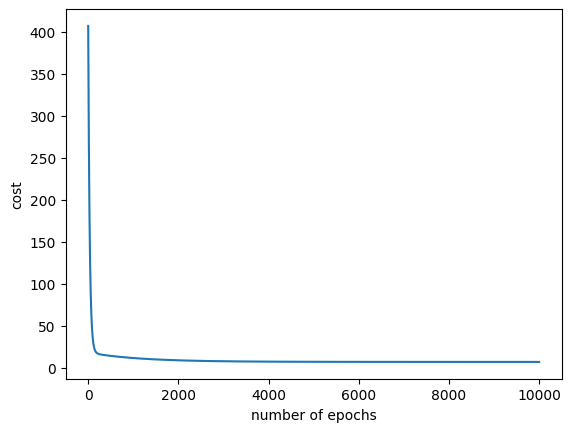

In [34]:
plt.plot(np.arange(1,n_epoch),J[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")

### All input features

Now, you will use `ALL` input features to predict `Next_Tmax`.

Extract the features and run the following code block again. Make note of the differences between this model and the one that only used `5 features`.


In [70]:
df = pd.read_csv('temperatures.csv')
features = df.drop(columns=['Next_Tmax'])
output = df['Next_Tmax']

Perform 70-30 split on the dataset again.

In [71]:
split_index = int(len(features) * 0.7)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

Call the gradient descent function again

In [72]:
n_epoch = 10000
learning_rate = 0.01
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
thetas, J_1= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)#this function needs two more parameters. You will need to add those based on your normalised data
print("Final Cost:", J_1[-1])
print("Final Thetas:", thetas)

Final Cost: 4.932057227111139
Final Thetas: [ 8.44424504  5.16661449  3.24528511  9.65986415 16.85091675  1.58037306
 -0.25426709  4.47526203 -2.16884473 -0.75808361  0.64050813  0.84744741
 -2.17124837 -0.9954036  -0.02643439 -0.96942035  0.52245423  1.71384117
  2.0050238  -0.41986011  3.27614202]


Visualise the cost again.

Text(0, 0.5, 'cost')

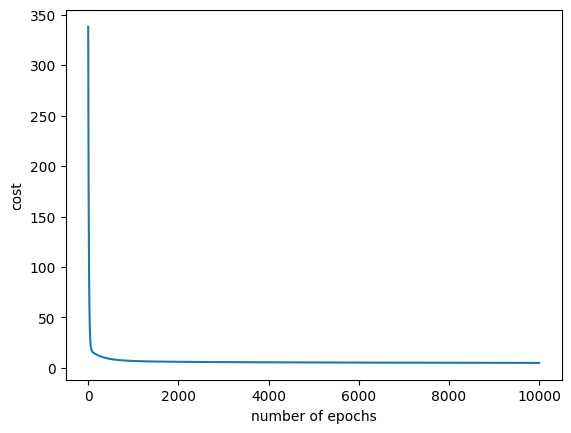

In [38]:
plt.plot(np.arange(1,n_epoch),J_1[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")

Plot the final cost values for the previous model (with 5 features) and the new model (with all features)
<br>

(Hint: your costs are stored in a list so you would need to extract just the last one for both the models)

In [73]:
#your plot here
print("Final Cost with all Features:", J_1[-1])
print("Final Cost with 5 best features:", J[-1])

Final Cost with all Features: 4.932057227111139
Final Cost with 5 best features: 7.022936357635028


### Analysis
Choose the best model out of the 2 you have developed and conduct the following analysis:

* Change the learning rates to `0.01`, `0.1`, and `1` and record the performance in terms of convergence plots ie. cost vs iterations for each learning rate

* Change the train-test split ratios to `60-40`, `70-30` and `80-20` and record the performance in terms of convergence plots for each ratio i.e cost vs iterations for each split ratio

* Change the number of iterations to `250`, `500`, `750` and `1000` and record the performance in terms of convergence plots for a range of iterations i.e cost vs range of iterations



#### Effect of learning rate
Use 70-30 split and number of iterations = 1000

In [68]:
df = pd.read_csv('temperatures.csv')
features = df.drop(columns=['Next_Tmax'])
output = df['Next_Tmax']

split_index = int(len(features) * 0.7)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

n_epoch = 1000
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)

Plot the `final` value of the cost against the learning rates

C:\Users\razah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\razah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\razah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\razah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: Run

[6.851482007164181, 4.932057227111139, 0.0]


Text(0, 0.5, 'Cost')

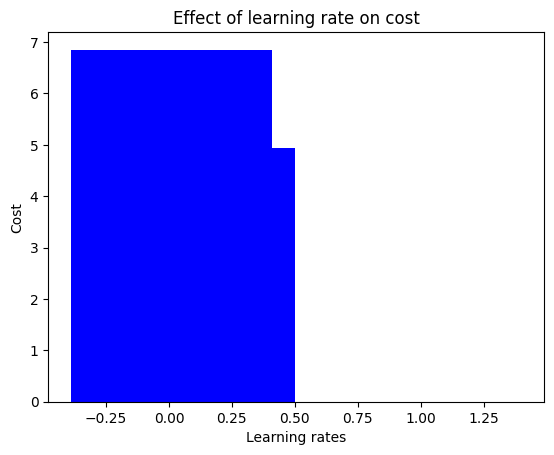

In [69]:
learning_rate_list = [0.01, 0.1, 1]
cost_list = []  #you are to add the LAST value of the cost from your model to this list for each learning rate used
learning_rate = 0.01
thetas, J_2= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_2[-1])

learning_rate = 0.1
thetas, J_3= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_3[-1])

learning_rate = 1
thetas, J_4= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_4[-1])
print(cost_list)
plt.bar(learning_rate_list, cost_list, color='blue')
plt.title('Effect of learning rate on cost')
plt.xlabel('Learning rates')
plt.ylabel('Cost')

#### Effect of test-train split
Use learning rate = 0.1 and iterations = 1000

In [44]:
features = df.drop(columns=['Next_Tmax'])
output = df['Next_Tmax']

n_epoch = 1000
learning_rate = 0.1

Plot the `final` value of the cost received for each split.

[5.143901299270494, 4.932057227111139, 3.680830253161997]


Text(0, 0.5, 'Cost')

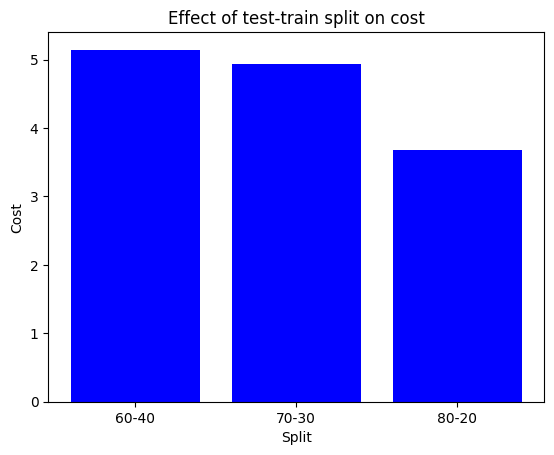

In [45]:
split_list = ['60-40', '70-30', '80-20']
cost_list = []  #you are to add the LAST value of the cost from your model to this list for each split used

split_index = int(len(features) * 0.6)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
thetas, J_3= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_3[-1])


split_index = int(len(features) * 0.7)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
thetas, J_3= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_3[-1])


split_index = int(len(features) * 0.8)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
thetas, J_3= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(J_3[-1])
print(cost_list)

plt.bar(split_list, cost_list, color='blue')
plt.title('Effect of test-train split on cost')
plt.xlabel('Split')
plt.ylabel('Cost')

#### Effect of number of iterations

Use 70-30 split and learning rate = 0.1

In [47]:
split_index = int(len(features) * 0.7)
X_train = features[:split_index]
Y_train = output[:split_index]

X_test = features[split_index:]
Y_test = output[split_index:]

min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
normalized_x = (X_train - min_val) / (max_val - min_val)
learning_rate = 0.1

Plot the `final` value of the cost against each iteration.

[5.868024055074424, 5.384858172996301, 5.1172678564481116, 4.932057227111139]


Text(0, 0.5, 'Cost')

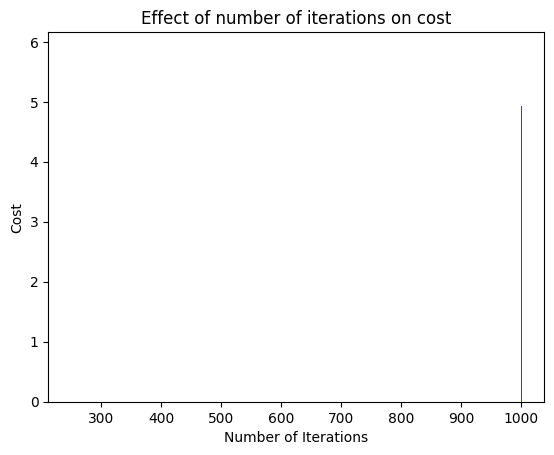

In [60]:
iter_list = [250, 500, 750, 1000] 
cost_list = []
n_epoch = 250
thetas, A= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(A[-1])

n_epoch = 500
thetas, B= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(B[-1])

n_epoch = 750
thetas, C= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(C[-1])

n_epoch = 1000
thetas, D= gradient_descent_MLR(normalized_x, Y_train, learning_rate, n_epoch)
cost_list.append(D[-1])
print(cost_list)
x = 4

plt.bar(iter_list[0], cost_list[0], color='red')
plt.bar(iter_list[1], cost_list[1], color='blue')
plt.bar(iter_list[3], cost_list[3], color='green')
plt.bar(iter_list[2], cost_list[2], color='yellow')

plt.title('Effect of number of iterations on cost')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

#### Document the effect of each change and give a concise explanation about it.
Using data in a 70-30 split with 1000 iteratons, we see that by increasing learning rate we're decreasing cost. This is because we're increasing the jumps in the converging graph. By setting the learning rate to be lower we're converging slower to the lowest point or zero-gradient point in the graph.

We see that by increasing ratio of test-data to train-data the cost of the function decreases, this is because by increasing the amount of data to train our model, the accuracy of the model increases. Thus final error between values predicted by the model versus the actaul recorded values decreases i.e the cost of the function decreases.

Similarly by increasing the total numbers of iterations the total cost of the function decreases. This is because by increasing the number of iterations we converge towards the needed/actual values of theta. The higher the number of iterations the closer we get to the needed theta values. Thus by increasing iterations we slowly improve the accuracy of the model and thus reduce the final cost values.